# Bit-Rate control Presentation

## Group members:

### Ivan Giacomo Collela
### Andrea Fusillo
### Davide Chiossi
### Edvinas Petravicius









.

.

# 2.1 Determine the RD curves for the MST



def analyze(self, x):
        #w = np.empty_like(x, dtype=np.int32)
        w = np.empty_like(x, dtype=np.int16)
        #w[:, 0] = (x[:, 0].astype(np.int32) + x[:, 1])/2
        w[:, 0] = (x[:, 0].astype(np.int32) + x[:, 1])/2
        #w[:, 1] = (x[:, 0].astype(np.int32) - x[:, 1])/2
        w[:, 1] = (x[:, 0].astype(np.int32) - x[:, 1])/2
        return w
 

## The astype() method returns a new DataFrame where the data types has been changed to the specified type.

## Quantization step we used

### Q = 16;32;64;128;256




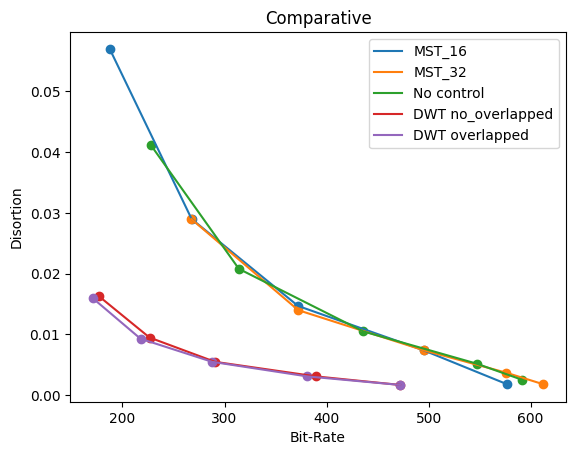

In [10]:
import matplotlib.pyplot as plt
x=[577.1,495.1,372.06,267.8,187.5]
y=[0.0018,0.0074,0.0147,0.029,0.057]
x2=[612.6,576.3,495.3,372.3,267.5]
y2=[0.0018,0.0037,0.0074,0.014,0.029]
x3=[591.6,547.1,436.1, 314.1,227.7]
y3=[0.00255,0.0052,0.0105,0.0208,0.0412]
x4=[472.03,389.76,290.68,226.5,176.9]
y4=[0.0017,0.0031,0.0055,0.0095,0.0163]
x5=[471.9,381.2,287.9,217.7,170.7]
y5=[0.0017,0.0031,0.0055,0.0093,0.0160]
plt.plot(x,y, label="MST_16")
plt.scatter(x,y)
plt.plot(x2,y2, label="MST_32")
plt.scatter(x2,y2) 
plt.plot(x3,y3, label="No control")
plt.scatter(x3,y3) 
plt.plot(x4,y4, label="DWT no_overlapped")
plt.scatter(x4,y4) 
plt.plot(x5,y5, label="DWT overlapped")
plt.scatter(x5,y5) 
plt.xlabel("Bit-Rate")
plt.ylabel("Disortion")
plt.title("Comparative")
plt.legend()
plt.show()

.

.

# 2.2 RD curves for the DWT using different levels

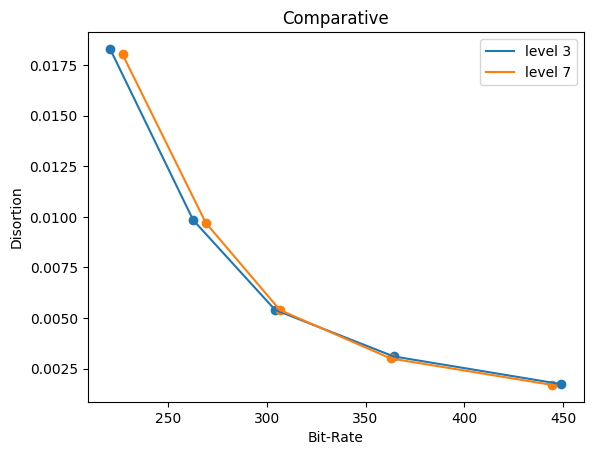

In [31]:
x=[448.8,364.2,304.3,262.9,220.9]
y=[0.00173,0.0031,0.0054,0.00984,0.0183]
x2=[444.29,362.7,306.799,269.29,227.200]
y2=[0.00169,0.0030,0.005388,0.0097,0.01803]
plt.plot(x,y, label="level 3")
plt.scatter(x,y)
plt.plot(x2,y2, label="level 7")
plt.scatter(x2,y2)
plt.xlabel("Bit-Rate")
plt.ylabel("Disortion")
plt.title("Comparative")
plt.legend()
plt.show()

# 2.2 RD curves for the DWT using different filter

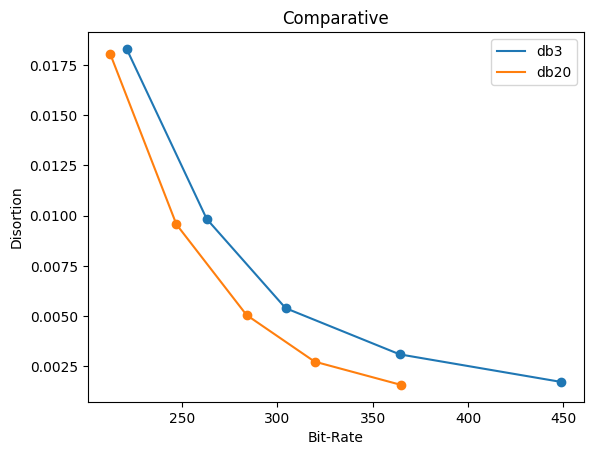

In [32]:
x=[448.8,364.2,304.3,262.9,220.9]
y=[0.00173,0.0031,0.0054,0.00984,0.0183]
x2=[364.9,319.5,283.80,247.0,212.2]
y2=[0.00158,0.00274,0.00506,0.00957,0.01807]
plt.plot(x,y, label="db3")
plt.scatter(x,y)
plt.plot(x2,y2, label="db20")
plt.scatter(x2,y2)
plt.xlabel("Bit-Rate")
plt.ylabel("Disortion")
plt.title("Comparative")
plt.legend()
plt.show()

# 2.4.1 Which has been the gain of the filters

In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import math
import numpy as np
import sounddevice as sd
from scipy import signal

In [7]:
def average_complex_energy(x):
    return np.sum(x.real.astype(np.double)*x.real.astype(np.double) +
                  x.imag.astype(np.double)*x.imag.astype(np.double))/len(x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

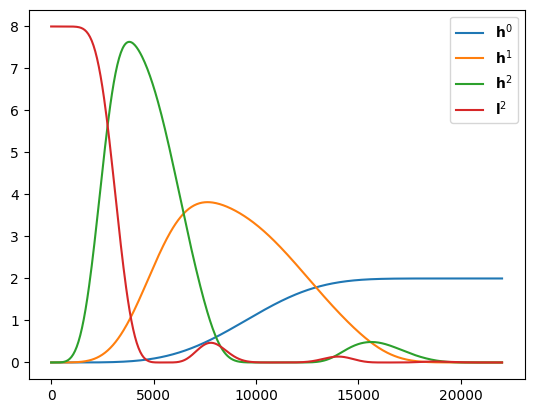

In [9]:
import pywt # pip install pywavelets
from IPython.display import Math

%matplotlib inline

#filters_name = "haar"
filters_name = "db5"
#filters_name = "db7"
#filters_name = "db11"
#filters_name = "db20"
#filters_name = "bior3.5"

wavelet = pywt.Wavelet(filters_name)

N_levels = 3

for l in range(N_levels):
    filters = wavelet.wavefun(level = (l+1))[:-1]
    w0, h0 = signal.freqz(filters[0], fs=44100)
    w1, h1 = signal.freqz(filters[1], fs=44100)
    plt.plot(w1, abs(h1), label="$\\mathbf{h}$" + f"$^{l}$")
    display(Math("\\text{Average energy of}~" + "\mathbf{h}" + f"^{l}" + f" = {average_complex_energy(h1)}"))
plt.plot(w0, abs(h0), label="$\\mathbf{l}$" + f"$^{l}$")
display(Math("\\text{Average energy of}~" + "\mathbf{l}" + f"^{l}" + f" = {average_complex_energy(h0)}"))
plt.legend(loc="best")
plt.show()

# 

# 2.4.2  Does the computation of the DWT using chunk overlapping increase the latency and jitter

.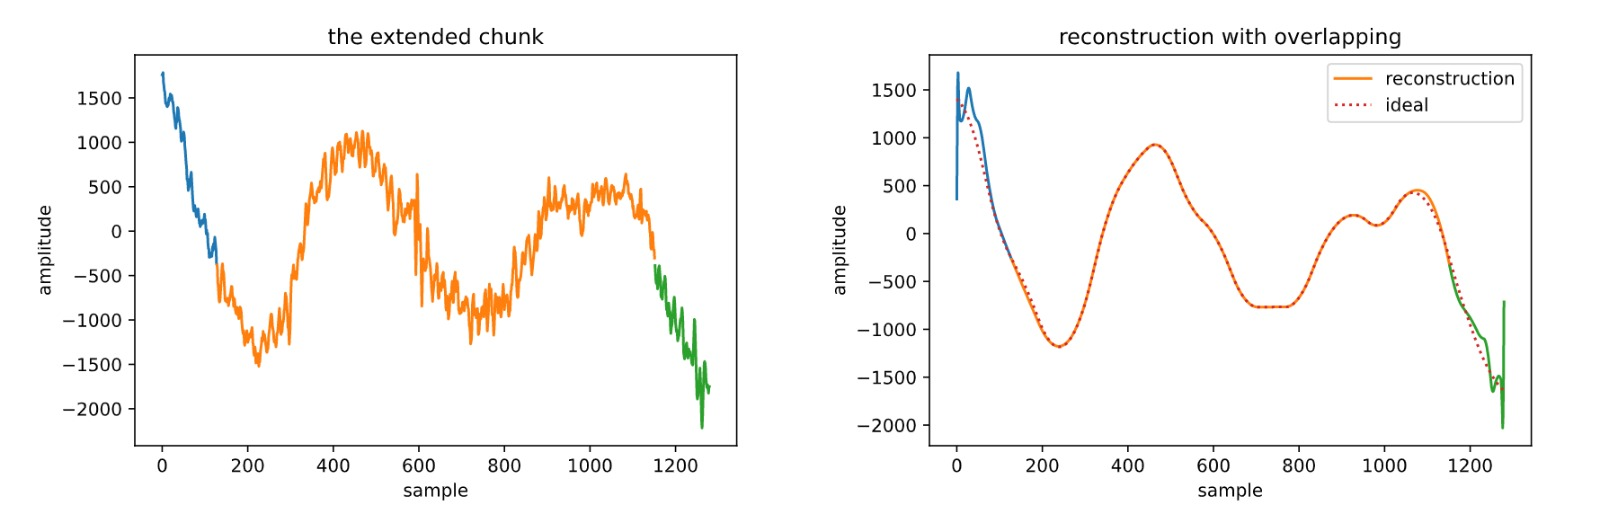

### One solution to avoid signal discontinuitites between chunks is to overlap the chunks. Thus, the current (-th) chunk uses also the last frames of the previous (-th) chunk and the first frames of the next (-th) chunk to compute the transform of the current extended (-th) chunk

# 2.4.3 Other transforms used in  audio encoding systems

## One of the most used transform is modified discrete cosine transform (MDCT) used in AC3, MP3, AAC, WMA, Ogg, opus...
## Adaptive differential pulse-code modulation (ADPCM) used in aptX, DTS, MQA. 
## Sub-band coding (SBC) used in MP2, MPC